In [1]:
import pandas as pd
import os
#csv파일 df으로 불러오기
csv_file_path = os.getenv('HOME')+'/data/data/bike-sharing-demand/train.csv'
train = pd.read_csv(csv_file_path)
train.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [2]:
import datetime
#datetime 자료형 변환
train["datetime"] = pd.to_datetime(train["datetime"])
#컬럼 생성
train['year']=train[ "datetime"].dt.year
train['month']=train[ "datetime"].dt.month
train['day']=train[ "datetime"].dt.day
train['hr']=train[ "datetime"].dt.hour
train['min']=train[ "datetime"].dt.minute
train['sec']=train[ "datetime"].dt.second
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hr,min,sec
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012,12,19,23,0,0


<AxesSubplot:xlabel='sec', ylabel='count'>

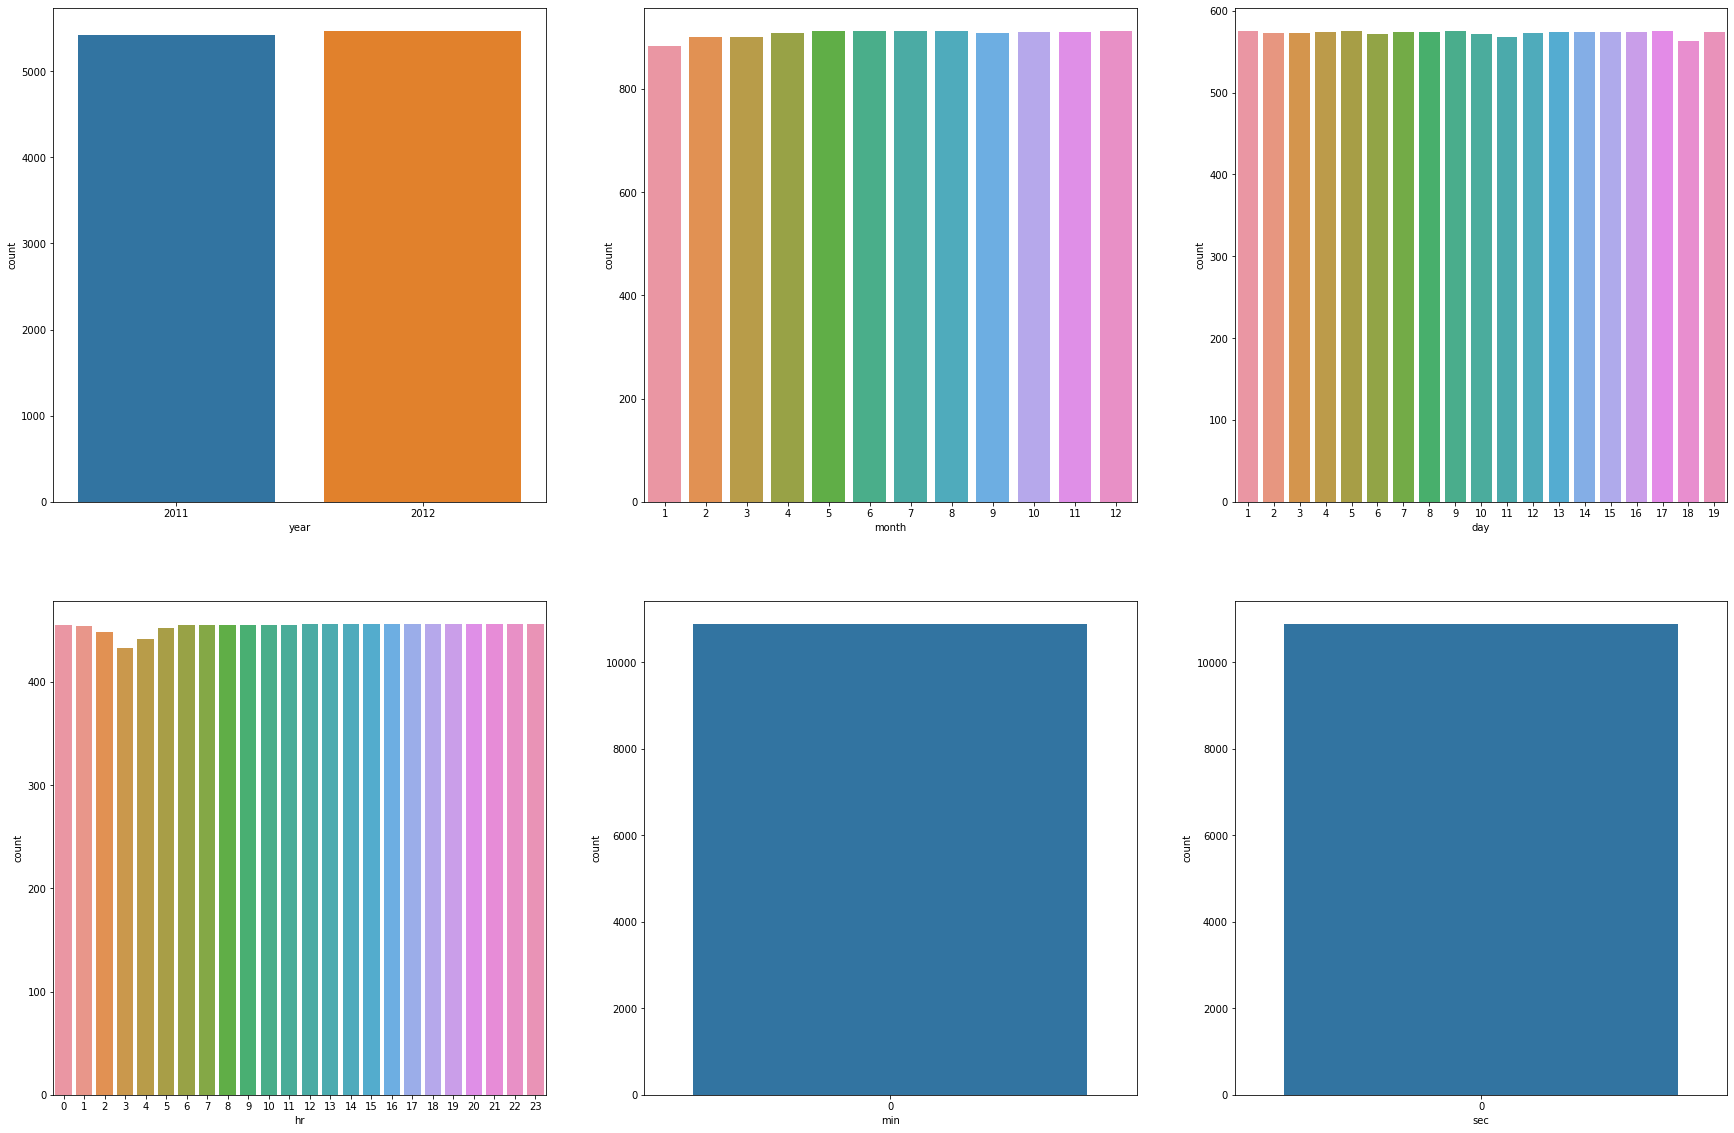

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
#연월일시분초 시각화

plt.figure(figsize=(30, 20))

plt.subplot(2,3,1)
sns.countplot(x = "year", data = train)

plt.subplot(2,3,2)
sns.countplot(x = "month", data = train)

plt.subplot(2,3,3)
sns.countplot(x = "day", data = train)

plt.subplot(2,3,4)
sns.countplot(x = "hr", data = train)

plt.subplot(2,3,5)
sns.countplot(x = "min", data = train)

plt.subplot(2,3,6)
sns.countplot(x = "sec", data = train)

In [4]:
from sklearn.model_selection import train_test_split

#X컬럼 중 year, month, day, min, sec, casusal, registered 제거
X = train[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'hr']]
y = train['count']
print(type(X), X.shape)
#데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

<class 'pandas.core.frame.DataFrame'> (10886, 9)
(8708, 9) (8708,)
(2178, 9) (2178,)


In [5]:
from sklearn.linear_model import LinearRegression
#모델 학습
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
len(predictions)

2178

In [6]:
import numpy as np
from sklearn.metrics import mean_squared_error
#rmse계산
mse = mean_squared_error(y_test, predictions)
RMSE = np.sqrt(mse)
print(mse)
print(RMSE)

21723.951252632167
147.39047205512358


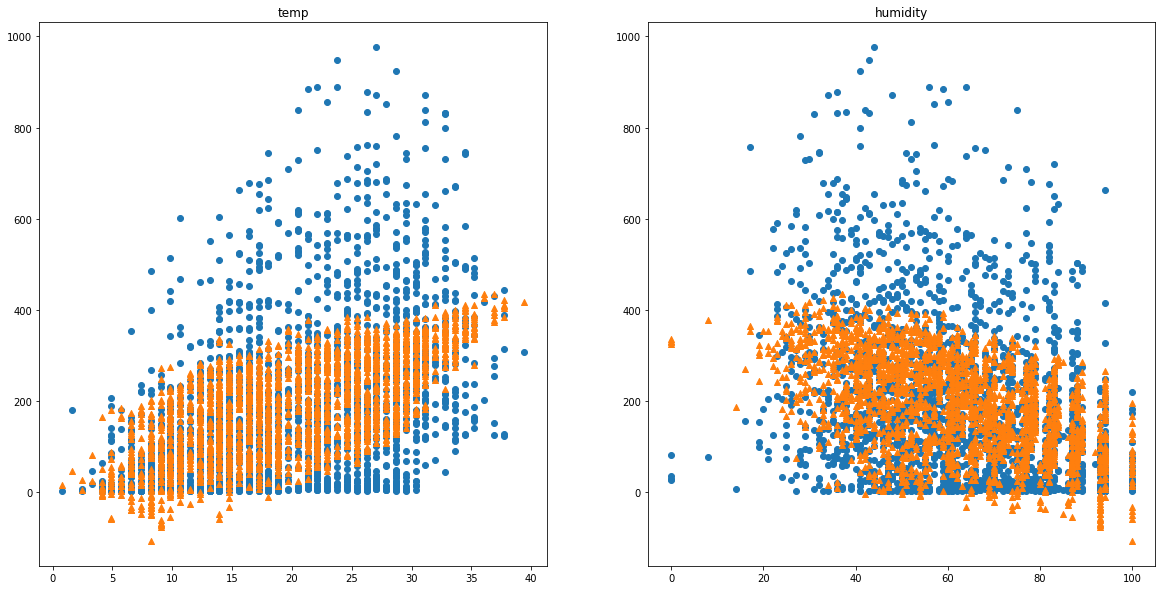

In [7]:
plt.figure(figsize=(20, 10))

plt.subplot(1,2,1)
plt.scatter(X_test['temp'], y_test)
plt.scatter(X_test['temp'], predictions, marker='^')
plt.title('temp')

plt.subplot(1,2,2)
plt.scatter(X_test['humidity'], y_test)
plt.scatter(X_test['humidity'], predictions, marker='^')
plt.title('humidity')
plt.show()